# George Hsu 50436963

## Research question/interests

How did trading price, performance and volatility timing react during the period of COVID-19?

In this research, the goal is to determine the price response, performance and timing of volatility of US funds during the Covid-19 outbreak by analyzing the time period of September 2020 to November 2021. 

Plan of analysis: For the price reaction, I will implement an event study approach to assess if there were certain events, such as government policy or weather disaster that caused the price fluctuate during the different periods. To determine the market performance across different period, I will study the complete period and then each of the quarterly separately. To be consistent with the performance analysis, I will evaluate the timing of volatility over the entire period as well as four quarters.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('/Users/georgehsu/project-group-group-57/data/raw/MutualFunds.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 54.1+ MB


,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking duplicated entries

In [ ]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## Summarize different values for numeric variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
initial_investment,16485.0,5.179181e+06,9.253584e+07,10.0000,1.000000e+03,2.500000e+03,5.000000e+05,5.000000e+09
subsequent_investment,8943.0,1.015926e+03,1.102397e+04,1.0000,5.000000e+01,5.000000e+01,1.000000e+02,5.000000e+05
total_net_assets,23749.0,4.924192e+09,2.109765e+10,10.0000,1.445834e+08,6.443283e+08,2.453409e+09,7.534100e+11
year_to_date_return,23382.0,9.348512e-02,8.227648e-02,-0.5228,2.610000e-02,9.200000e-02,1.497000e-01,5.789000e-01
day50_moving_average,23782.0,2.363873e+01,3.312631e+01,1.2790,1.099725e+01,1.495950e+01,2.518450e+01,2.018338e+03
...,...,...,...,...,...,...,...,...
peer_social_max,14839.0,1.130824e+01,1.732701e+00,5.8600,1.071000e+01,1.152000e+01,1.204000e+01,1.725000e+01
governance_score,15388.0,6.210819e+00,2.800713e+00,0.0000,6.230000e+00,7.350000e+00,7.740000e+00,1.402000e+01
peer_governance_min,14839.0,5.387539e+00,7.481764e-01,2.6100,5.050000e+00,5.300000e+00,5.830000e+00,1.165000e+01
peer_governance_avg,14839.0,7.219275e+00,8.207053e-01,3.0400,6.930000e+00,7.420000e+00,7.540000e+00,1.165000e+01


## Get the number of rows and columns in the dataset

In [ ]:
df.shape

(23783, 298)

## Find out the names of the columns to know what to keep

In [ ]:
print(df.columns.tolist())

['fund_symbol', 'quote_type', 'region', 'fund_short_name', 'fund_long_name', 'currency', 'initial_investment', 'subsequent_investment', 'fund_category', 'fund_family', 'exchange_code', 'exchange_name', 'exchange_timezone', 'management_name', 'management_bio', 'management_start_date', 'total_net_assets', 'year_to_date_return', 'day50_moving_average', 'day200_moving_average', 'week52_high_low_change', 'week52_high_low_change_perc', 'week52_high', 'week52_high_change', 'week52_high_change_perc', 'week52_low', 'week52_low_change', 'week52_low_change_perc', 'investment_strategy', 'fund_yield', 'morningstar_overall_rating', 'morningstar_risk_rating', 'inception_date', 'last_dividend', 'last_cap_gain', 'annual_holdings_turnover', 'investment_type', 'size_type', 'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio', 'fund_prospectus_net_expense_ratio', 'fund_prospectus_gross_expense_ratio', 'fund_max_12b1_fee', 'fund_max_front_end_sales_load', 'category_max_front_e

## Create a new dataset that keeps the data I need

In [ ]:
df1 = df[['fund_symbol', 'fund_return_2021_q2', 'fund_return_2021_q1', 'fund_return_2020_q4', 'fund_return_2020_q3', 'fund_return_2020_q2', 'category_return_2020', 'fund_return_2020']]
df1 = df1.dropna()
df1.head()

,fund_symbol,fund_return_2021_q2,fund_return_2021_q1,fund_return_2020_q4,fund_return_2020_q3,fund_return_2020_q2,category_return_2020,fund_return_2020
5,AAAIX,0.05694,0.04851,0.13337,0.07670,0.18919,0.13511,0.18496
14,AAARX,0.05471,0.04628,0.13144,0.07552,0.18771,0.13511,0.17737
17,AAAUX,0.05714,0.04869,0.13412,0.07692,0.18983,0.13511,0.18752
21,AABAX,0.04022,0.03353,0.08029,0.04928,0.11164,0.11719,0.12803
29,AABOX,0.01603,-0.02539,0.00551,0.00897,0.02902,0.07522,0.06663


## Get the information for the new dataset

In [ ]:
df1.describe()

,fund_return_2021_q2,fund_return_2021_q1,fund_return_2020_q4,fund_return_2020_q3,fund_return_2020_q2,category_return_2020,fund_return_2020
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000
mean,0.043937,0.029697,0.098965,0.043110,0.131082,0.105352,0.106404
std,0.031589,0.054594,0.079936,0.038649,0.093700,0.105225,0.130856
min,-0.044300,-0.180040,-0.058190,-0.188840,-0.069690,-0.245370,-0.392570
25%,0.019955,-0.004610,0.028835,0.015890,0.055815,0.042970,0.040470
50%,0.040160,0.021030,0.086980,0.037370,0.118380,0.080560,0.077810
75%,0.061385,0.052075,0.145770,0.065770,0.188965,0.135110,0.149835
max,0.211430,0.328660,0.514880,0.212470,0.696240,0.559120,1.123170


## Try to know what investment strategy is about in the dataset

In [ ]:
df['investment_strategy']

0        The investment seeks total return in excess of...
1        The investment seeks long-term capital appreci...
2        The investment seeks the highest total return ...
3        The investment seeks long-term capital appreci...
4        The investment seeks the highest total return ...
                               ...                        
23778    The investment seeks capital appreciation. The...
23779    The investment seeks to provide a high level o...
23780    The investment seeks long-term growth of capit...
23781    The investment seeks long-term capital appreci...
23782    The investment seeks capital appreciation. The...
Name: investment_strategy, Length: 23783, dtype: object

## Try to understand the information of category return in 2020

In [ ]:
df1['category_return_2020']

5        0.13511
14       0.13511
17       0.13511
21       0.11719
29       0.07522
          ...   
23765    0.04905
23774    0.04842
23779    0.02911
23780    0.25479
23781    0.00882
Name: category_return_2020, Length: 3375, dtype: float64

## Create plots to understand the relationship between category return and fund return in the different quarters of 2020 in order to see if the investments were affected by the virus.

Text(0.5, 1.0, 'Fund Return in Second Quarter of 2020 vs. Category Return 2020')

<Figure size 800x400 with 0 Axes>

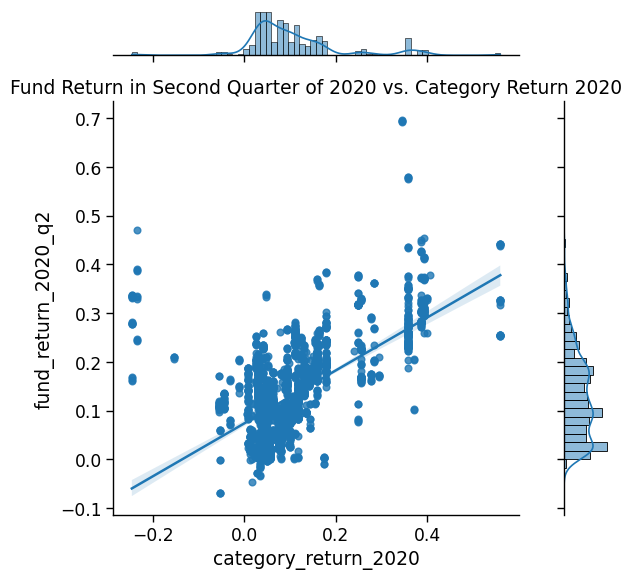

In [ ]:
plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='category_return_2020', y='fund_return_2020_q2', data=df1, kind="reg", space=1)
plt.title('Fund Return in Second Quarter of 2020 vs. Category Return 2020')


Text(0.5, 1.0, 'Fund Return in Third Quarter of 2020 vs. Category Return 2020')

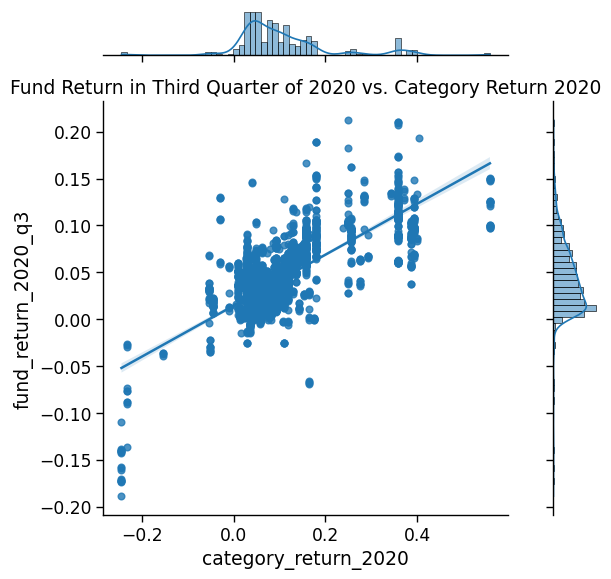

In [ ]:
sns.jointplot(x='category_return_2020', y='fund_return_2020_q3', data=df1, kind="reg", space=1)
plt.title('Fund Return in Third Quarter of 2020 vs. Category Return 2020')

Text(0.5, 1.0, 'Fund Return in Third Quarter of 2020 vs. Category Return 2020')

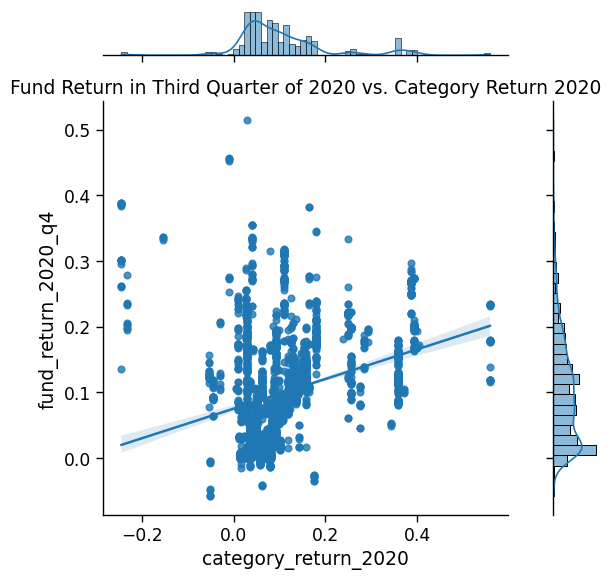

In [ ]:
sns.jointplot(x='category_return_2020', y='fund_return_2020_q4', data=df1, kind="reg", space=1)
plt.title('Fund Return in Third Quarter of 2020 vs. Category Return 2020')

In [ ]:
df1['fund_return_2020_q2'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the Second Quarter of 2020')

## Try to understand the relationship of fund return and category return in 2020

In [ ]:
print('Average Category Return in 2020:', df1['category_return_2020'].mean())

print('Average Fund Return in 2020:', df1['fund_return_2020'].mean())

Average Category Return in 2020: 0.10535236148148147
Average Fund Return in 2020: 0.10640350814814815


## Compare the performance of category return and fund return in 2020.

Text(0.5, 1.0, 'Category Return and Fund Return in 2020')

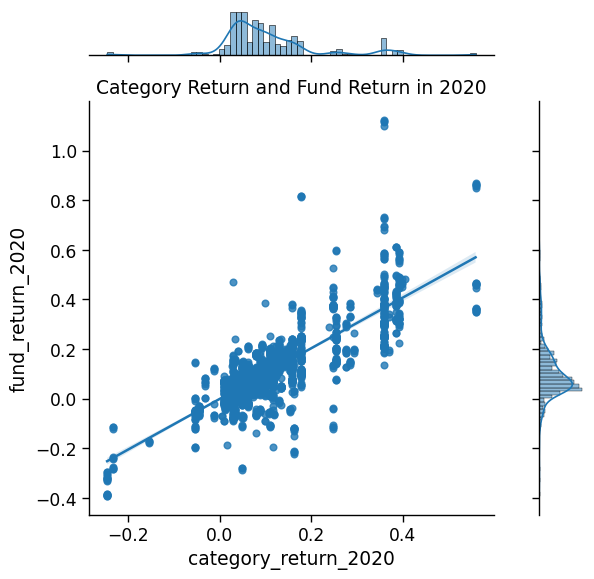

In [ ]:
sns.jointplot(x='category_return_2020', y='fund_return_2020', data=df1, kind="reg", space=1)
plt.title('Category Return and Fund Return in 2020')


## Find out the performance and distribution of fund return in different periods of 2020 

Average Fund Return in 2020: 0.10640350814814815


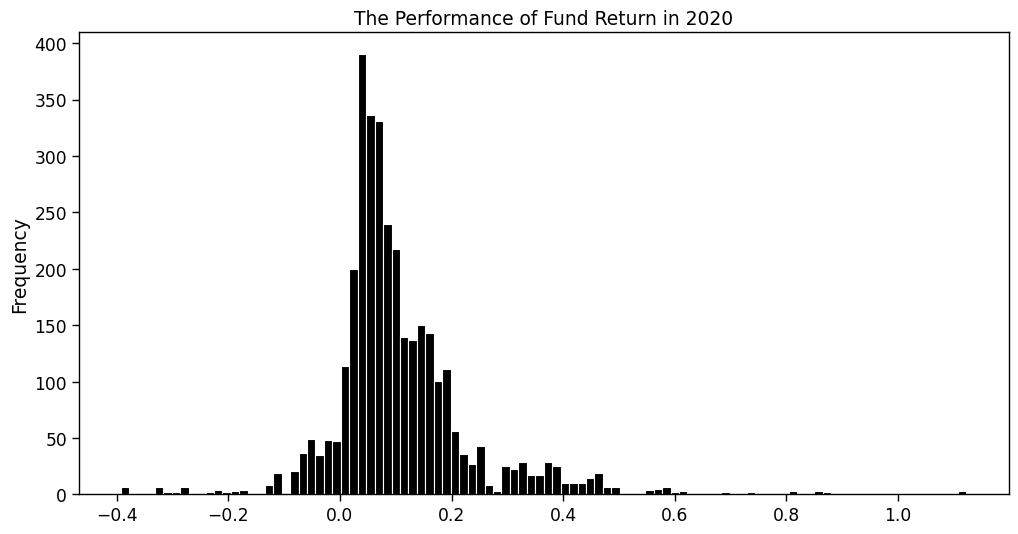

In [ ]:
df1['fund_return_2020'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in 2020')
print('Average Fund Return in 2020:', df1['fund_return_2020'].mean())


## The distribution of fund return shows that the return is around 0.1% in 2020, and we can use this number to find if the average return is gradually decreasing as the virus spreads.

## Find out the performance of fund return in the second quarter of 2021

Average Fund Return in the Second Quarter of 2021: 0.04393708444444445


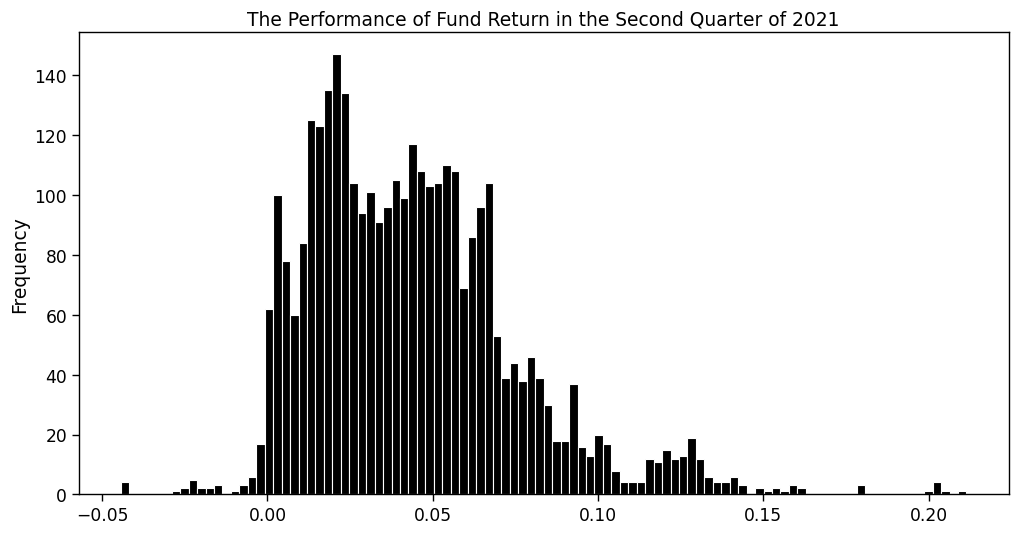

In [ ]:
df1['fund_return_2021_q2'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the Second Quarter of 2021')
print('Average Fund Return in the Second Quarter of 2021:', df1['fund_return_2021_q2'].mean())

## The average return after a year of the virus had dropped to 0.04%, which shows that the virus has impacted the return on investment.

Average Fund Return in the Second Quarter of 2020: 0.13108218074074074


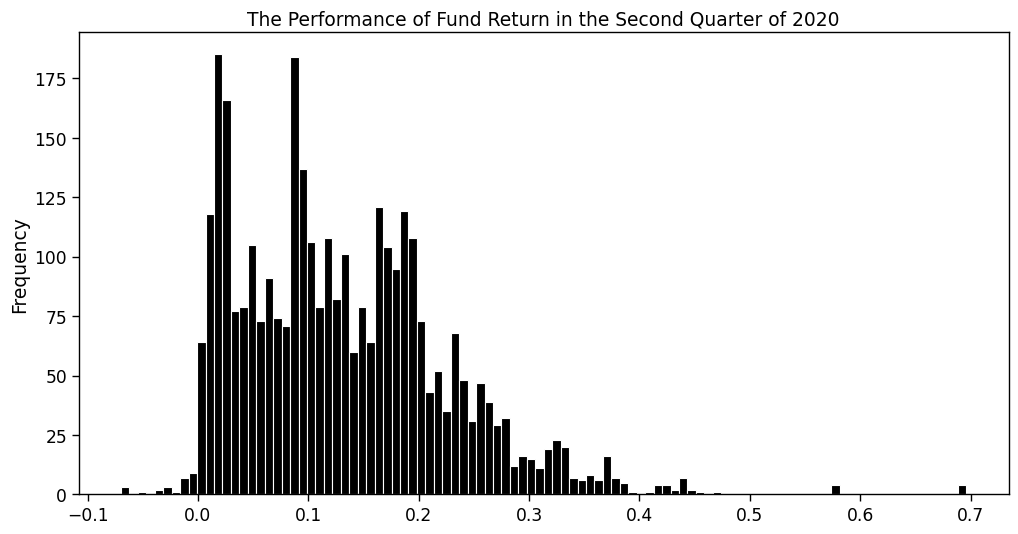

In [ ]:
df1['fund_return_2020_q2'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the Second Quarter of 2020')
print('Average Fund Return in the Second Quarter of 2020:', df1['fund_return_2020_q2'].mean())

## In the second quarter of 2020 when the virus just started, the average return was 0.13%, which was much higher than the second quarter of 2021.

## Create visualizations of different periods to understand the performance throughout the time.

Average Fund Return in the Third Quarter of 2020: 0.04311002370370371


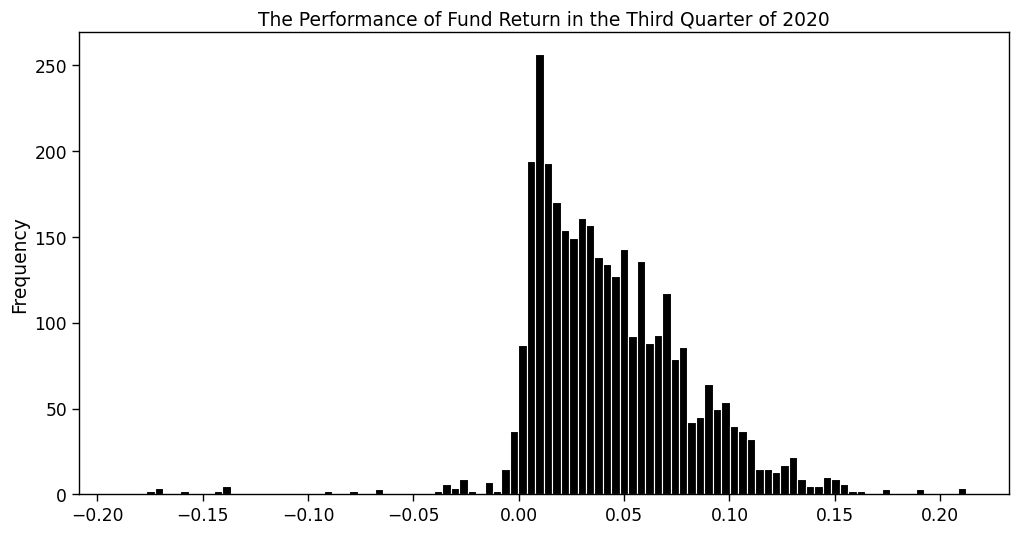

In [ ]:
df1['fund_return_2020_q3'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the Third Quarter of 2020')
print('Average Fund Return in the Third Quarter of 2020:', df1['fund_return_2020_q3'].mean())


Average Fund Return in the Fourth Quarter of 2020: 0.09896532444444445


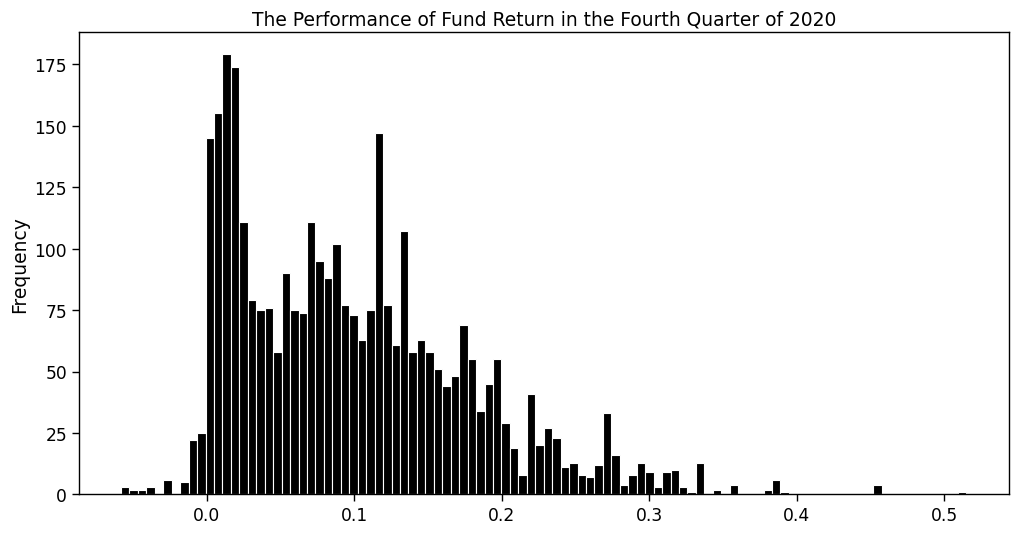

In [ ]:
df1['fund_return_2020_q4'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the Fourth Quarter of 2020')
print('Average Fund Return in the Fourth Quarter of 2020:', df1['fund_return_2020_q4'].mean())

Average Fund Return in the First Quarter of 2021: 0.029697066666666664


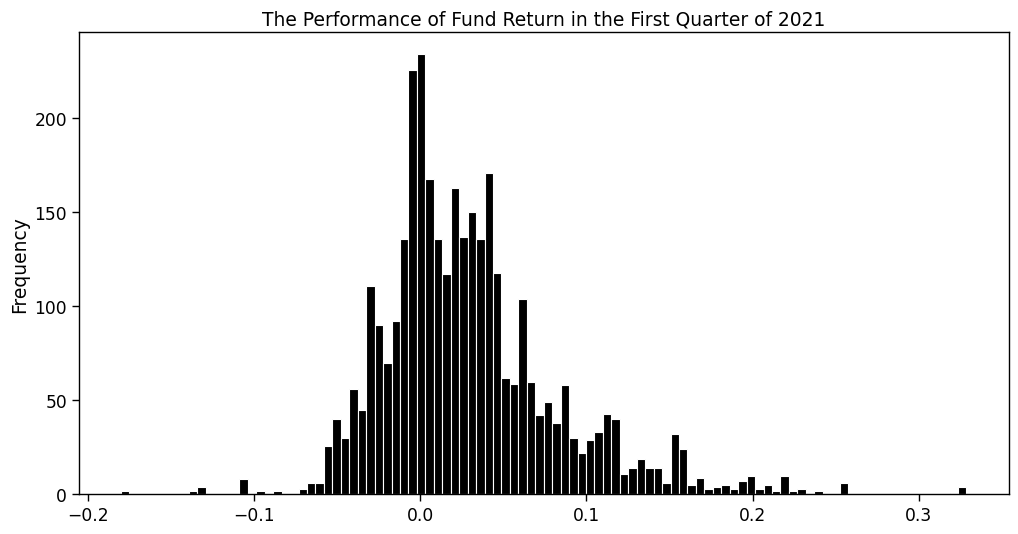

In [ ]:
df1['fund_return_2021_q1'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='black',edgecolor='white', title='The Performance of Fund Return in the First Quarter of 2021')
print('Average Fund Return in the First Quarter of 2021:', df1['fund_return_2021_q1'].mean())

# Pandemics have been very rare and therefore this project provides evidence of what impact a global infection can have on investment funds. As COVID-19 spread across the united states with unprecedented speed, consumer and investor behavior dramatically shifted. The funds underperformed from the third quarter of 2020 to the second quarter of 2021 and the returns were much lower compared to the beginning of 2020.